In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
import pickle as pkl
import numpy as np
import pandas as pd

## Lettura dati

In [2]:
data_file='international_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
nazioni=pkl.load(infile)
continent_nations=pkl.load(infile)
infile.close()

In [3]:
for naz in nazioni:
    print('%30s DA: %s  A:  %s  [Samples: %3d]'%(naz,
                                                   trend['date'][naz][0],
                                                   trend['date'][naz][-1],
                                                  len(np.unique(trend['date'][naz]))))
    

                   Afghanistan DA: 2020-02-24  A:  2021-01-07  [Samples: 319]
                       Albania DA: 2020-03-09  A:  2021-01-07  [Samples: 305]
                       Algeria DA: 2020-02-25  A:  2021-01-07  [Samples: 318]
                       Andorra DA: 2020-03-02  A:  2021-01-07  [Samples: 312]
                        Angola DA: 2020-03-20  A:  2021-01-07  [Samples: 294]
           Antigua and Barbuda DA: 2020-03-13  A:  2021-01-07  [Samples: 301]
                     Argentina DA: 2020-01-01  A:  2021-01-07  [Samples: 373]
                       Armenia DA: 2020-03-01  A:  2021-01-07  [Samples: 313]
                     Australia DA: 2020-01-26  A:  2021-01-07  [Samples: 348]
                       Austria DA: 2020-02-25  A:  2021-01-07  [Samples: 318]
                    Azerbaijan DA: 2020-03-01  A:  2021-01-07  [Samples: 313]
                       Bahamas DA: 2020-03-16  A:  2021-01-07  [Samples: 298]
                       Bahrain DA: 2020-02-24  A:  2021-01-07  [

## Plot dati continentali

In [4]:
continente='europe'
num_nazioni=len(continent_nations[continente])

In [5]:
# per i subplot determina la griglia
grid_shape=auto_grid_shape(num_nazioni,cols=3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,48)


In [6]:
#indicatori_selected=['new_cases','total_deaths', 'new_deaths', 'total_cases_per_million',
#       'new_cases_per_million', 'total_deaths_per_million','new_deaths_per_million']

indicatori_selected=['new_cases_per_million','new_deaths_per_million']
#indicatori_selected=['total_cases_per_million','total_deaths_per_million']

last_days=60

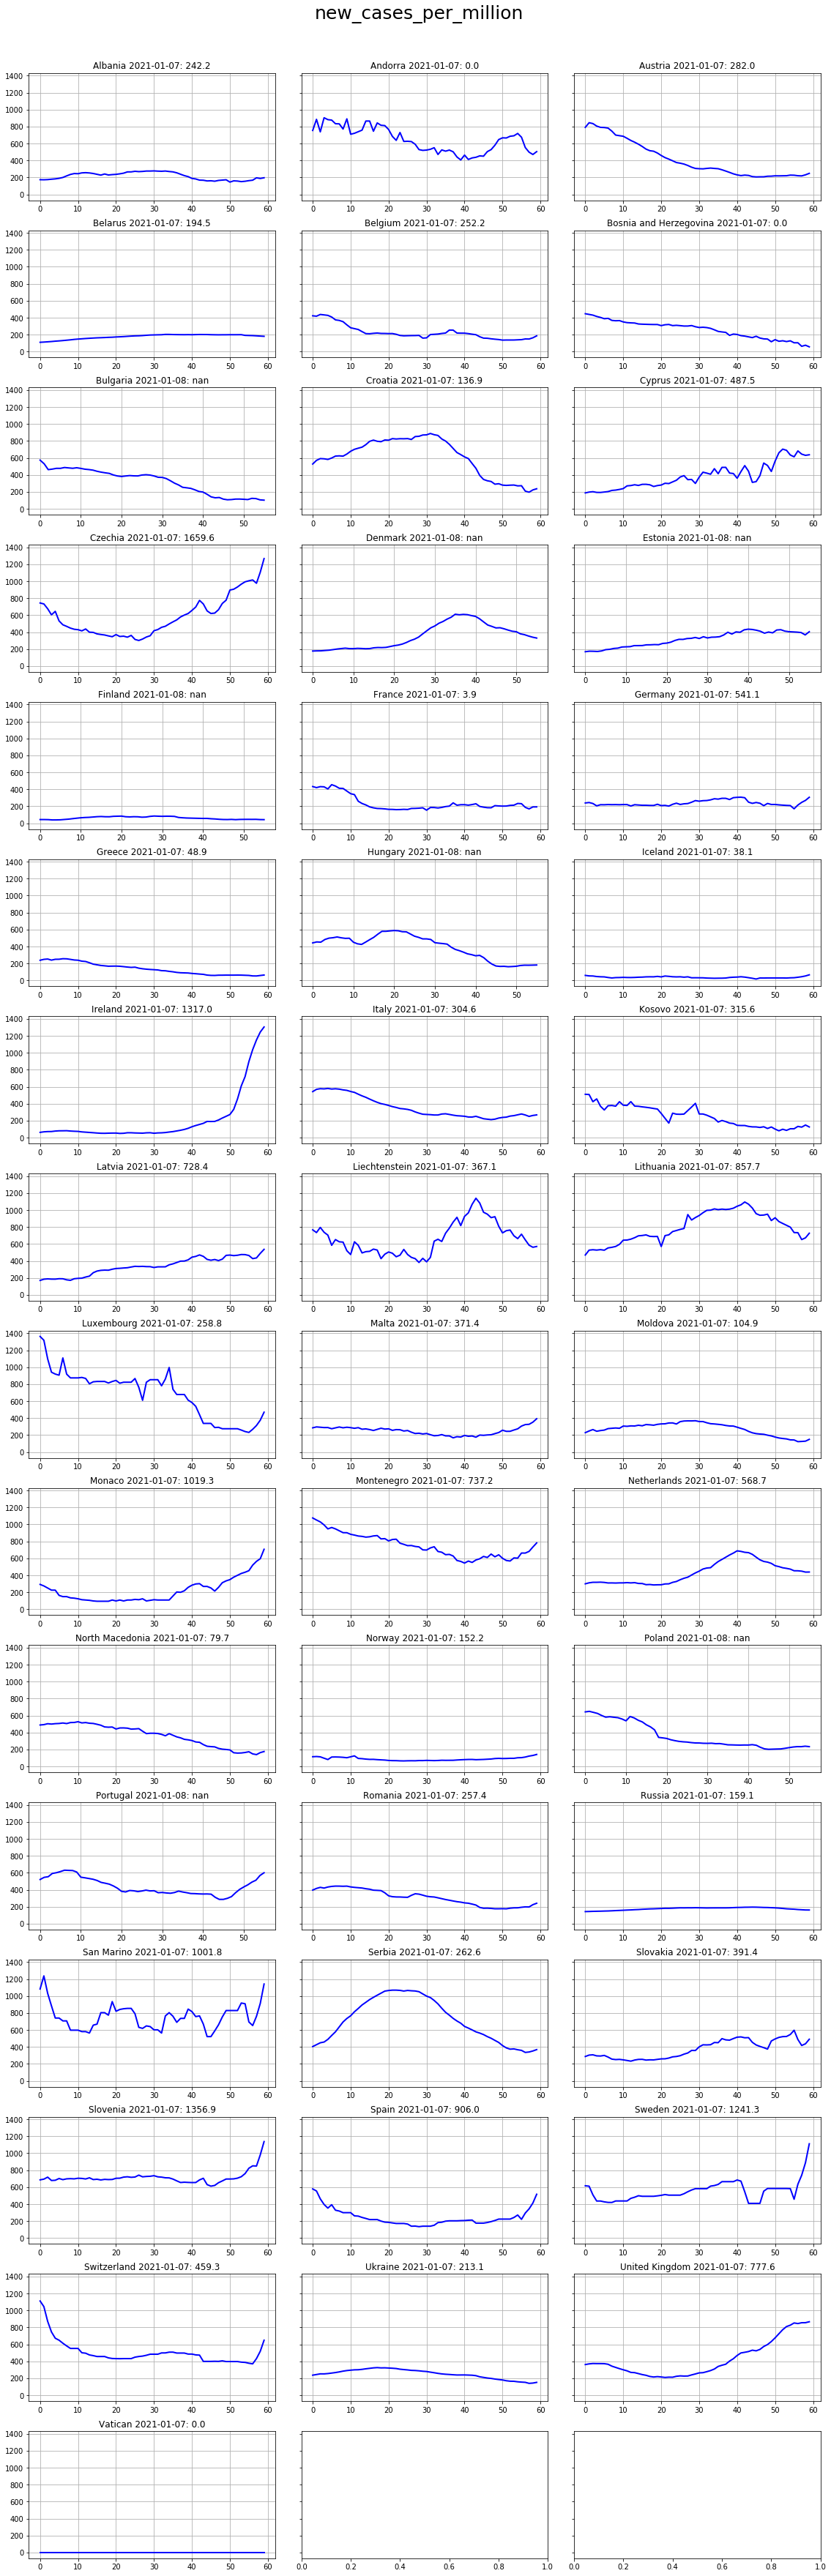

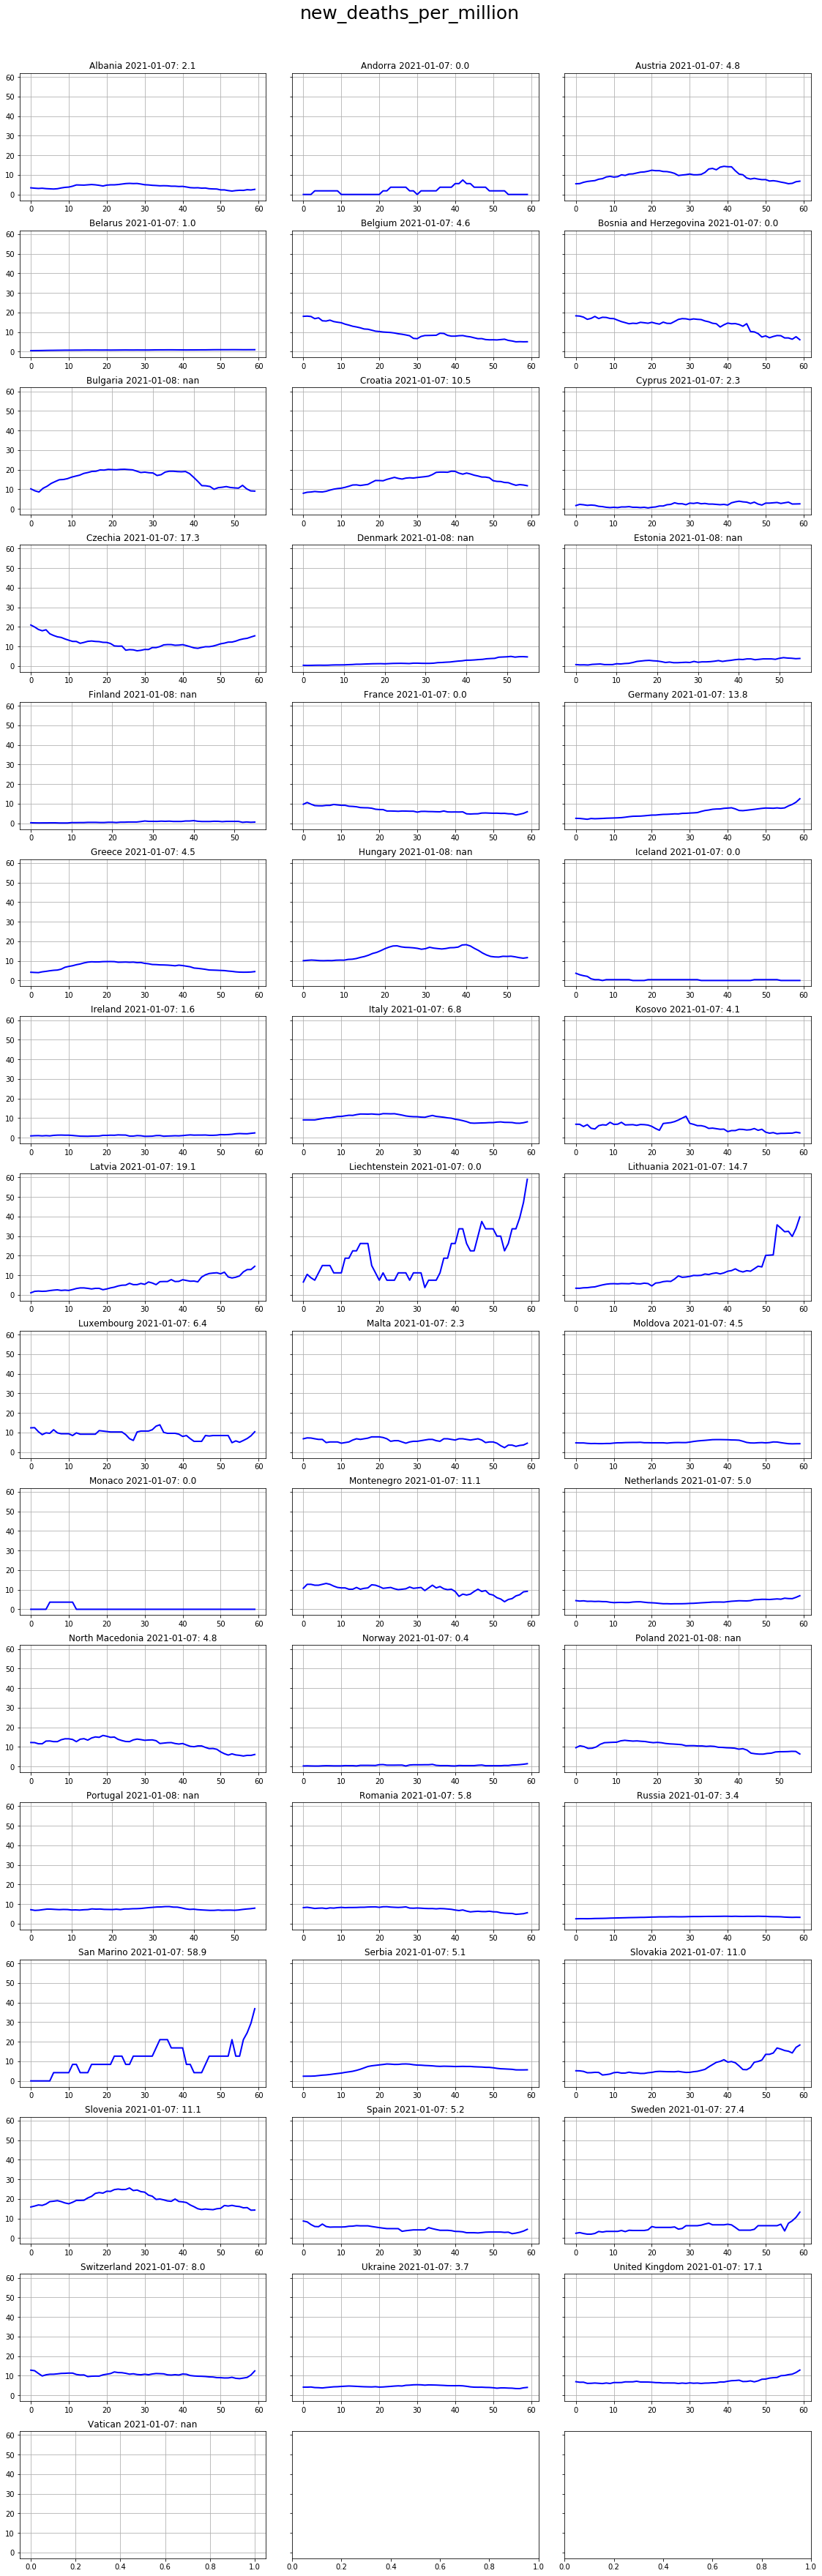

In [7]:
for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=True,figsize=figsize_multi)
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,naz in enumerate(continent_nations[continente]):
        ax[grid_seq[i]].plot(range(len(trend['date'][naz][-last_days:])),moving_function_rev1(trend[indicatore][naz][-last_days:],np.mean,3,3),
                             'b-',linewidth=2,label='Trend')
        ax[grid_seq[i]].set_title(naz+' %s: %.1f'%(trend['date'][naz][-1],trend[indicatore][naz][-1]))
        #ax[grid_seq[i]].legend()
        ax[grid_seq[i]].grid()
        #ax[grid_seq[i]].set_yscale('log')
        
    fig.savefig('PIC_%s_%s.JPG'%(continente,indicatore))

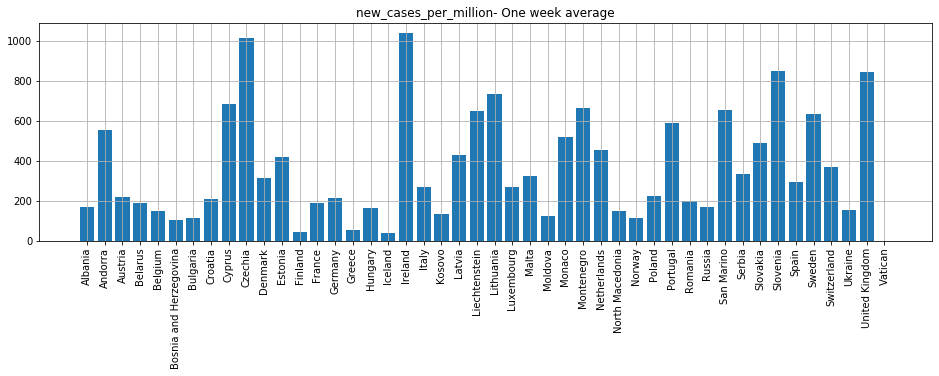

C:\Users\klaat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


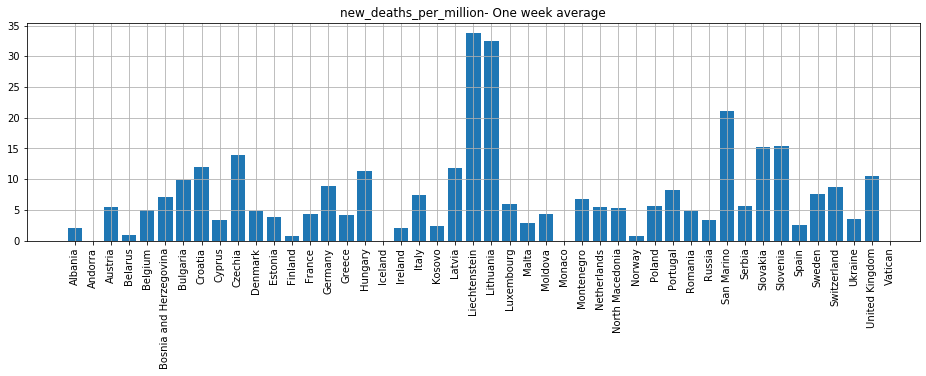

In [8]:
for indicatore in indicatori_selected:
    #valori=[trend[indicatore][naz][-1] for naz in continent_nations[continente]]
    valori=[np.nanmean(trend[indicatore][naz][-7:]) for naz in continent_nations[continente]]
    valori=np.array(valori)
    plt.figure(figsize=(16,4))
    plt.title(indicatore+'- One week average')
    plt.bar(range(len(valori)),valori)
    plt.xticks(range(len(valori)),continent_nations[continente],rotation=90)
    plt.grid()
    plt.show()

#### Versione ordinata

In [11]:
ordine=np.argsort(valori)
ordine

array([ 1, 27, 17, 31,  3, 18,  0, 20, 40, 25, 35,  8, 43, 15, 13, 26, 34,
        4, 30, 29,  2, 37, 24, 28,  5, 19, 41, 42, 14, 44, 21,  7,  9, 38,
       39, 36, 23, 22, 32, 16, 12, 11, 10,  6, 33, 45], dtype=int64)

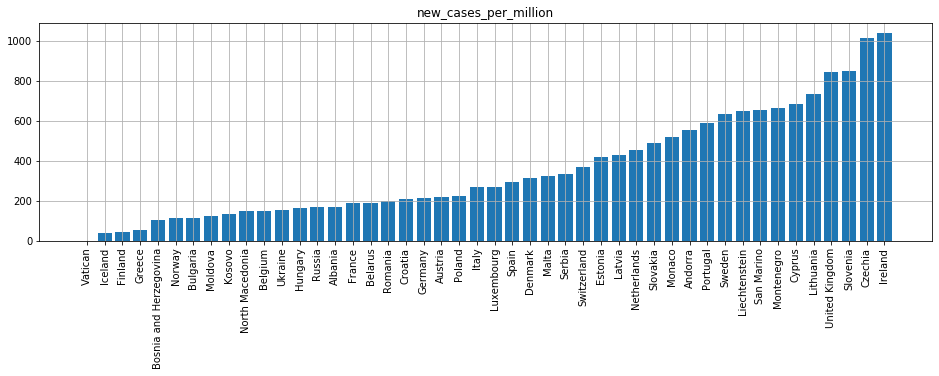

C:\Users\klaat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


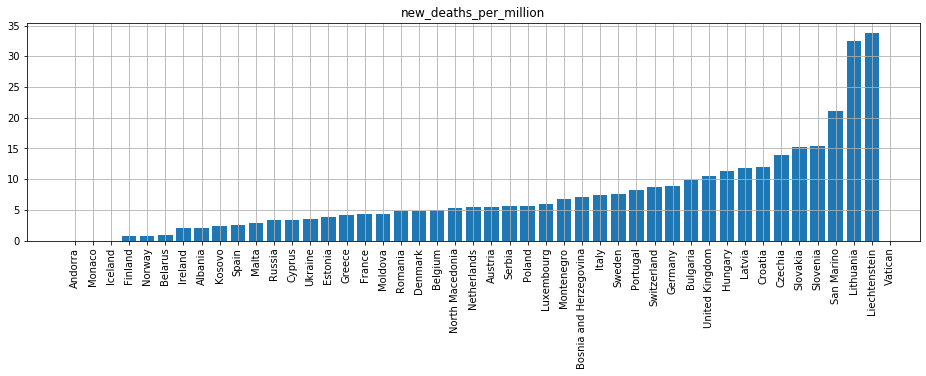

In [12]:
for indicatore in indicatori_selected:
    #valori=np.array([trend[indicatore][naz][-1] for naz in continent_nations[continente]])
    valori=[np.nanmean(trend[indicatore][naz][-7:]) for naz in continent_nations[continente]]
    valori=np.array(valori)
    ordine=np.argsort(valori)
    plt.figure(figsize=(16,4))
    plt.title(indicatore)
    plt.bar(range(len(valori)),valori[ordine])
    plt.xticks(range(len(valori)),continent_nations[continente][ordine],rotation=90)
    plt.grid()
    plt.show()

## Scatter plots comparativi

In [ ]:
x_indicator='new_cases_per_million'
y_indicator='new_deaths_per_million'

days_average=21
continente='europe'

x_valori=[np.mean(trend[x_indicator][naz][-days_average:]) for naz in continent_nations[continente]]
y_valori=[np.mean(trend[y_indicator][naz][-days_average:]) for naz in continent_nations[continente]]


In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,10))

ax.plot(x_valori,y_valori,marker='8',linestyle='')

for i in range(len(continent_nations[continente])):
    ax.text(x_valori[i],
            y_valori[i],
            continent_nations[continente][i])
        
ax.hlines(np.nanmean(y_valori),min(x_valori),max(x_valori),colors='r', linestyles='--')
ax.vlines(np.nanmean(x_valori),min(y_valori),max(y_valori),colors='r', linestyles='--')
ax.set_xlabel(x_indicator)
ax.set_ylabel(y_indicator)
ax.set_title('%s - Average on last %d days'%(continente,days_average))